In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [499]:
data = pd.read_csv('data/data.csv')

In [500]:
data.drop(data.columns[0], axis=1, inplace=True)

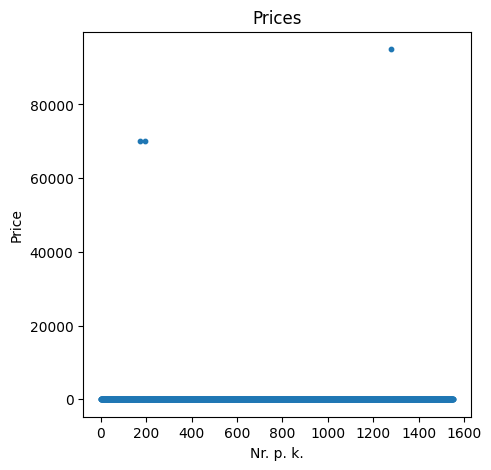

In [501]:
# plot raw price data
prices = data.iloc[:, -1].values
plt.figure(figsize=(5, 5))
plt.scatter(range(len(prices)), prices, s=10)
plt.title('Prices')
plt.xlabel('Nr. p. k.')
plt.ylabel('Price')
plt.show()

In [502]:
# save a copy of data before operations for print statements 
data_before = data.copy()

# remove outliers and duplicate rows
data = data.drop(data[data['price(in lakhs)'] > 6000].index)
print(f'Dropped {len(data_before) - len(data) if not data.empty else 0} outliers')
data = data.drop_duplicates()
print(f'Dropped {len(data_before) - len(data) if not data.empty else 0} duplicates')

# delete a copy of data before operations
del data_before

Dropped 3 outliers
Dropped 422 duplicates


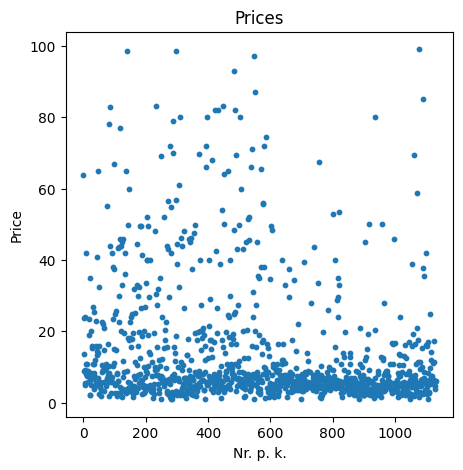

In [503]:
# plot updated price data
prices = data.iloc[:, -1].values
plt.figure(figsize=(5, 5))
plt.scatter(range(len(prices)), prices, s=10)
plt.title('Prices')
plt.xlabel('Nr. p. k.')
plt.ylabel('Price')
plt.show()

In [504]:
# date doesn't really matter and the year is in data[manufacturing_year] column
data.drop(columns=['registration_year'], inplace=True)

In [505]:
data['insurance_validity'] = data['insurance_validity'].str.replace('Third Party insurance', 'Third Party')

In [506]:
# remove year from name column
data['car_name'] = data['car_name'].str.split(n=1).str[1]

In [507]:
bad_rows = set()
def get_bad_rows(col, condition):
    if type(condition) == list:
        for i, row in data[~data[col].isin(condition)].iterrows():
            bad_rows.add(i)
    else:
        for i, row in data[data[col] == condition].iterrows():
            bad_rows.add(i)
    return

In [508]:
get_bad_rows('insurance_validity', ['Comprehensive', 'Not Available', 'Third Party', 'Zero Dep'])

In [509]:
get_bad_rows('fuel_type', '5 Seats')

In [510]:
get_bad_rows('ownsership', ['Fifth Owner', 'First Owner', 'Second Owner', 'Third Owner'])

In [511]:
get_bad_rows('transmission', ['Automatic', 'Manual'])

In [512]:
data.drop(bad_rows, inplace=True)
print(f'Dropped {len(bad_rows)} bad rows')

Dropped 25 bad rows


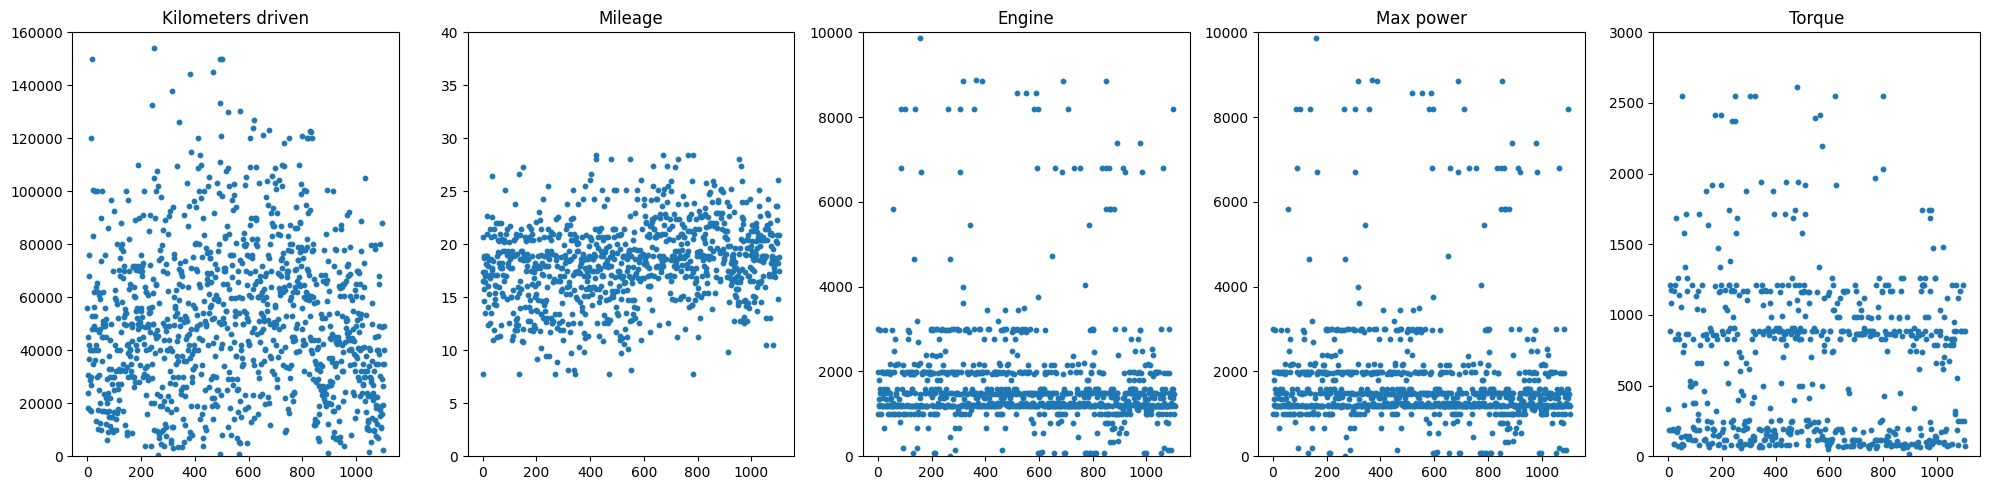

In [513]:
# plot all numerical columns
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns
data_len = len(data)

axes[0].scatter(range(data_len), data['kms_driven'].values, s=10)
axes[0].set_ylim(0, 160_000)
axes[0].set_title('Kilometers driven')

axes[1].scatter(range(data_len), data['mileage(kmpl)'].values, s=10)
axes[1].set_ylim(0, 40)
axes[1].set_title('Mileage')

axes[2].scatter(range(data_len), data['engine(cc)'].values, s=10)
axes[2].set_ylim(0, 10_000)
axes[2].set_title('Engine')

axes[3].scatter(range(data_len), data['max_power(bhp)'].values, s=10)
axes[3].set_ylim(0, 10_000)
axes[3].set_title('Max power')

axes[4].scatter(range(data_len), data['torque(Nm)'].values, s=10)
axes[4].set_ylim(0, 3_000)
axes[4].set_title('Torque')

plt.tight_layout()
plt.show()

In [514]:
# remove outlier columns
for i, row in data.iterrows():
    if row['kms_driven'] > 160_000 or row['engine(cc)'] > 10_000 or row['max_power(bhp)'] > 10_000:
        data.drop(i, inplace=True)

In [515]:
# drop torque(Nm) column because values in it are theoreticaly impossible 
data.drop(columns=['torque(Nm)'], inplace=True)

In [516]:
# make "correct" data => data that removes theoreticaly impossible values
correct_data = data[data['mileage(kmpl)'] <= 40]
for i, row in data.iterrows():
    if row['mileage(kmpl)'] > 40:
        data.loc[i, 'mileage(kmpl)'] = correct_data['mileage(kmpl)'].median() + random.randint(-2, 2)

In [517]:
# fill nan values with median of the column
data['engine(cc)'] = data['engine(cc)'].fillna(data['engine(cc)'].median())
data['max_power(bhp)'] = data['max_power(bhp)'].fillna(data['max_power(bhp)'].median())

In [518]:
data

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),price(in lakhs)
0,Mercedes-Benz S-Class S400,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,63.75
1,Nissan Magnite Turbo CVT XV Premium Opt BSVI,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,8.99
2,BMW X1 sDrive 20d xLine,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,23.75
3,Kia Seltos GTX Plus,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13.56
4,Skoda Superb LK 1.8 TSI AT,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1546,Honda Jazz V CVT,Comprehensive,Petrol,5,19446,First Owner,Automatic,2018,18.20,1199.0,1199.0,6.50
1547,Maruti Ertiga VXI CNG,Third Party,CNG,7,26500,First Owner,Manual,2022,26.11,1462.0,1462.0,11.50
1550,Honda WR-V i-VTEC S,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,5.85
1551,Volkswagen Polo 1.0 MPI Comfortline,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,4.75
